In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from warble.HGMM import *


/Users/jcapde87/Envs/udg_seminar/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
N = 1000        # Number of points
K = 5           # Number of components
ln, en = generate_data(N,K)

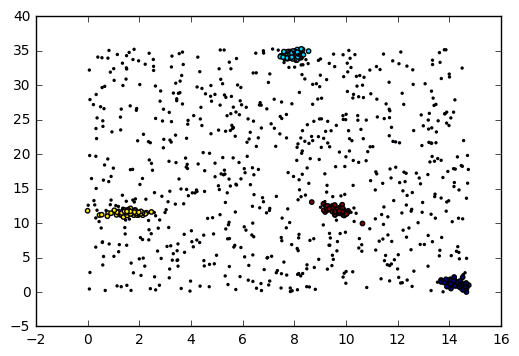

In [5]:
ln_norm = -np.tile(np.min(ln,axis=0),(N,1)) + ln
xk, yk = np.max(ln_norm, axis=0)
aux = np.where(en==K-1)[0]
ln_norm[aux,:] = np.array([np.random.uniform(0,xk,len(aux)),np.random.uniform(0,yk,len(aux))]).T
ln = ln_norm
plt.scatter(ln[np.where(en!=K-1),0], ln[np.where(en!=K-1),1], c=en[np.where(en!=K-1)]*1./(K-1), marker='o', s=10)
plt.scatter(ln[np.where(en==K-1),0], ln[np.where(en==K-1),1], c=en[np.where(en==K-1)]*1./(K-1), marker='o', s=2)
plt.show()

In [6]:
#Set number of components to  be estimated
K = 5

#Set Hyperparameters
a_pi= 1.
m_mu = np.mean(ln,axis=0)
beta_mu = 9./(10*np.linalg.norm(ln.max(axis=0)-ln.min(axis=0))**2)
W_Delta = 1.*np.eye(2)
nu_Delta = 10.

#Initialization
pi_, en_, mk_, betamuk_, nuk_, Wk_ = initialization(ln, K, N, a_pi, m_mu, beta_mu, nu_Delta, W_Delta)

maxIt = 50
pi_, en_, mk_, betamuk_, nuk_, Wk_, bounds = variational_inference(maxIt, ln, K, N, a_pi, m_mu, beta_mu, nu_Delta, W_Delta, pi_, en_, mk_, betamuk_, nuk_, Wk_)


Iteration: 0 Lowerbound: -7254.5388109 Diff: -0.862155262234
Iteration: 1 Lowerbound: -6707.65784924 Diff: 0.081530837434
Iteration: 2 Lowerbound: -6542.90439951 Diff: 0.0251804763852
Iteration: 3 Lowerbound: -6468.88336939 Diff: 0.0114426286419
Iteration: 4 Lowerbound: -6415.0045964 Diff: 0.00839886740254
Iteration: 5 Lowerbound: -6359.85994048 Diff: 0.00867073432975
Iteration: 6 Lowerbound: -6291.75540704 Diff: 0.010824408934
Iteration: 7 Lowerbound: -6198.63403398 Diff: 0.0150228860983
Iteration: 8 Lowerbound: -6062.1180799 Diff: 0.0225195141828
Iteration: 9 Lowerbound: -5862.61106247 Diff: 0.0340304030591
Iteration: 10 Lowerbound: -5678.08625545 Diff: 0.0324977111504
Iteration: 11 Lowerbound: -5590.66145721 Diff: 0.0156376484088
Iteration: 12 Lowerbound: -5557.165211 Diff: 0.00602757789984
Iteration: 13 Lowerbound: -5552.46235577 Diff: 0.000846985523723
Iteration: 14 Lowerbound: -5551.52444966 Diff: 0.00016894568639
Iteration: 15 Lowerbound: -5551.27536562 Diff: 4.48696948856e-05
I

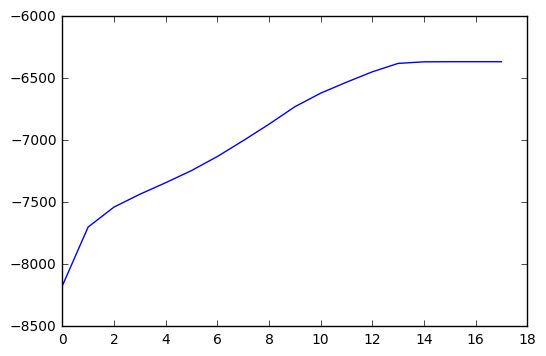

In [5]:
plt.plot(bounds)
plt.show()


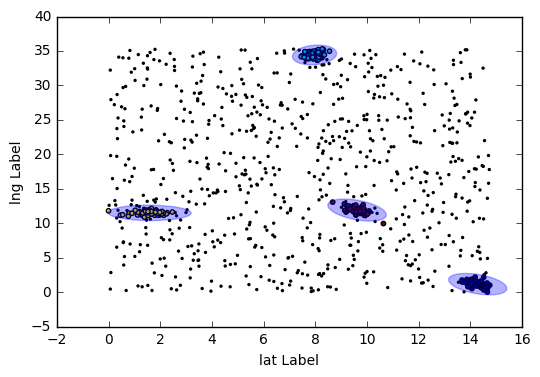

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
for k in xrange(K-1):
    Expmuk_ = mk_[k, :]
    ExpDeltak_ = Wk_[k, :, :]*nuk_[k]
    plot_cov_ellipse(np.linalg.inv(ExpDeltak_), Expmuk_, nstd=4, ax=ax, alpha=0.3, color="blue")

ax.scatter(ln[np.where(en!=K-1),0], ln[np.where(en!=K-1),1], c=en[np.where(en!=K-1)]*1./(K-1), marker='o', s=10)
ax.scatter(ln[np.where(en==K-1),0], ln[np.where(en==K-1),1], c=en[np.where(en==K-1)]*1./(K-1), marker='o', s=2)
ax.set_xlabel('lat Label')
ax.set_ylabel('lng Label')
plt.show()

